In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
fraud_df=pd.read_csv('onlinefraud.csv')

In [3]:
fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1048557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fraud_df.shape

(1048562, 11)

In [5]:
f_df=fraud_df.head(1022560)

In [6]:
f_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1022555,47.0,CASH_OUT,95001.40,C1754043162,182.00,0.00,C1688927068,1136028.63,1231030.03,0.0,0.0
1022556,47.0,PAYMENT,9625.61,C1665870412,15600.00,5974.39,M1417065075,0.00,0.00,0.0,0.0
1022557,47.0,PAYMENT,8581.00,C480579916,5050.00,0.00,M280843649,0.00,0.00,0.0,0.0
1022558,47.0,PAYMENT,8652.07,C706614416,41236.00,32583.93,M1268440714,0.00,0.00,0.0,0.0


In [7]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022560 entries, 0 to 1022559
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1022560 non-null  float64
 1   type            1022560 non-null  object 
 2   amount          1022560 non-null  float64
 3   nameOrig        1022560 non-null  object 
 4   oldbalanceOrg   1022560 non-null  float64
 5   newbalanceOrig  1022560 non-null  float64
 6   nameDest        1022560 non-null  object 
 7   oldbalanceDest  1022560 non-null  float64
 8   newbalanceDest  1022560 non-null  float64
 9   isFraud         1022560 non-null  float64
 10  isFlaggedFraud  1022560 non-null  float64
dtypes: float64(8), object(3)
memory usage: 85.8+ MB


<b>Note,  step:-</b> represents a unit of time where 1 step equals 1 hour

In [8]:
f_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.022560e+06,1.022560e+06,1.022560e+06,1.022560e+06,1.022560e+06,1.022560e+06,1.022560e+06,1022560.0
mean,2.562091e+01,1.591012e+05,8.771157e+05,8.977220e+05,9.827761e+05,1.120427e+06,5.554686e-04,0.0
std,1.288866e+01,2.588677e+05,2.980587e+06,3.017526e+06,2.302313e+06,2.422455e+06,2.356185e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.400000e+01,1.246051e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.800658e+04,1.598900e+04,0.000000e+00,1.315056e+05,2.252310e+05,0.000000e+00,0.0
75%,3.900000e+01,2.151366e+05,1.382405e+05,1.776768e+05,9.224336e+05,1.159654e+06,0.000000e+00,0.0
max,4.700000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


<b> Checking for any null values</b>

In [9]:
f_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The dataset has no null values


In [10]:
step_info=f_df['step'].describe()
print(step_info)

count    1.022560e+06
mean     2.562091e+01
std      1.288866e+01
min      1.000000e+00
25%      1.400000e+01
50%      2.000000e+01
75%      3.900000e+01
max      4.700000e+01
Name: step, dtype: float64


# Performing EDA

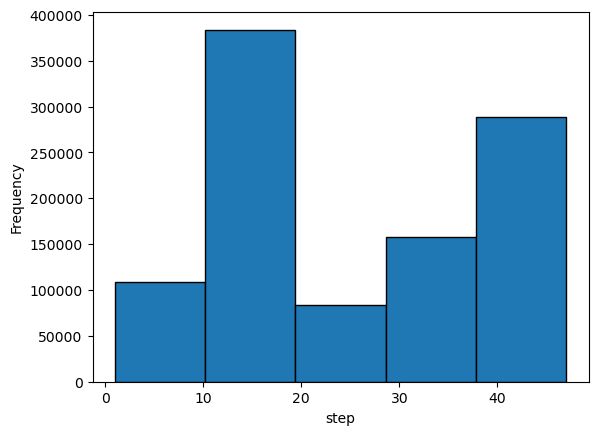

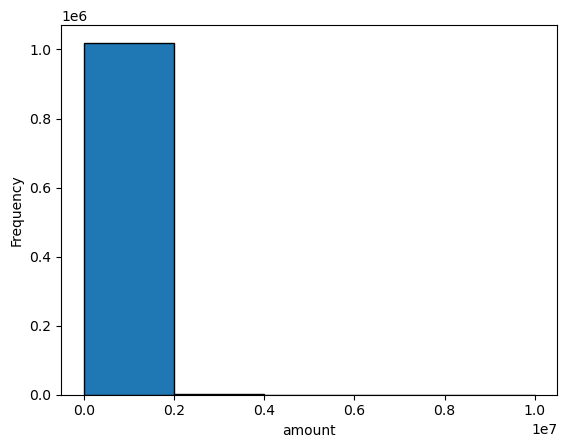

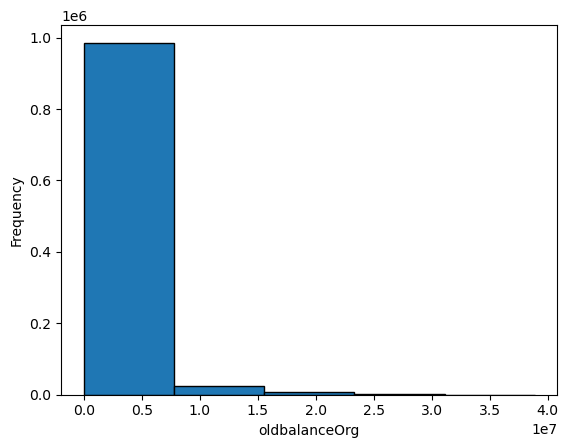

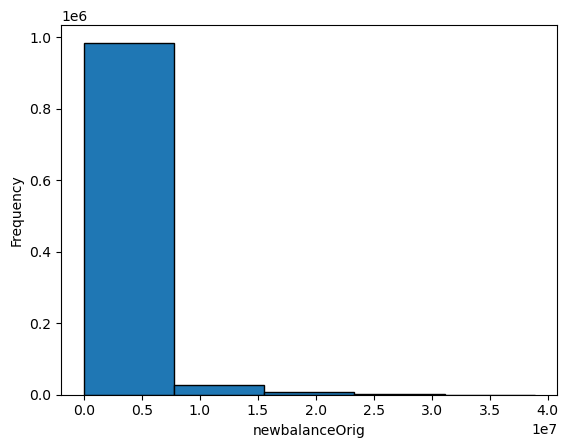

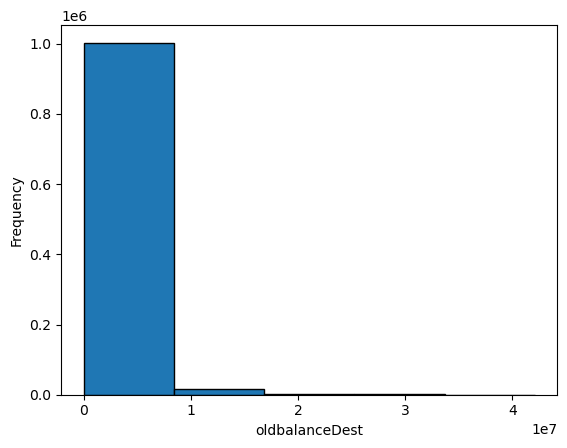

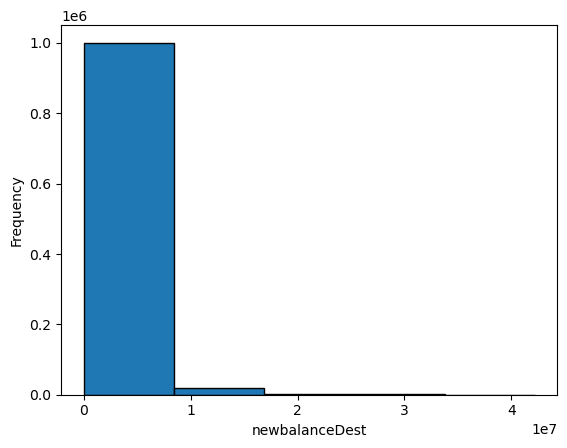

In [11]:
##Looking at features with data type float64 or int64 first
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    f_df[i].plot(kind='hist', bins=5, edgecolor='black')
    plt.xlabel(i)
    plt.show()

<b> We observe that other than feature 'step', other features have outliers</b>

Outliers are data points that deviate significantly from the majority of the data. They can arise due to various reasons such as measurement errors, data entry mistakes, or rare events.

Outliers can have a detrimental effect on predictive models. They can influence the model's coefficients and lead to suboptimal performance.

Outliers can distort visualizations and make it challenging to interpret and compare different aspects of the data. By removing outliers, the visualization becomes more informative and easier to interpret, providing a clearer representation of the patterns and trends present in the data

<b>However, before removing outliers, it is important to assess the potential impact on the analysis. Hence we will perform a sensitivity analysis to evaluate the robustness of our analysis or models by comparing results with and without outliers</b>

In [12]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(f_df[i].quantile(0.10))
    print(f_df[i].quantile(0.90))

    print('\n')

amount
4314.135000000001
374259.1389999999


oldbalanceOrg
0.0
1926395.2309999964


newbalanceOrig
0.0
2066230.1019999997


oldbalanceDest
0.0
2731418.7249999996


newbalanceDest
0.0
3116092.67




Note:- <b>When you calculate the 10th percentile of a feature in a DataFrame using df[i].quantile(0.10), you are finding the value below which 10% of the data in that specific feature falls. </b>

In easy words:- the 10th percentile represents the value below which 10% of the data falls

# Winsorization

In [13]:
new_df=f_df.copy()  ##Creating a copy of original df. We will be using this new df for outlier treatment

In [14]:
from scipy.stats.mstats import winsorize
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    winsorized_coll = winsorize(new_df[i], limits=[0.10, 0.10])
    new_df[i]=winsorized_coll
    

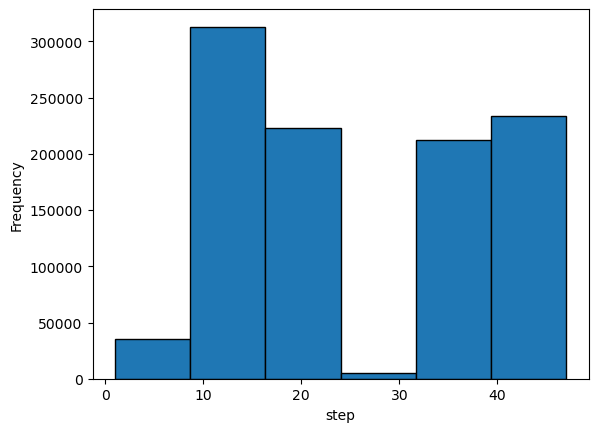

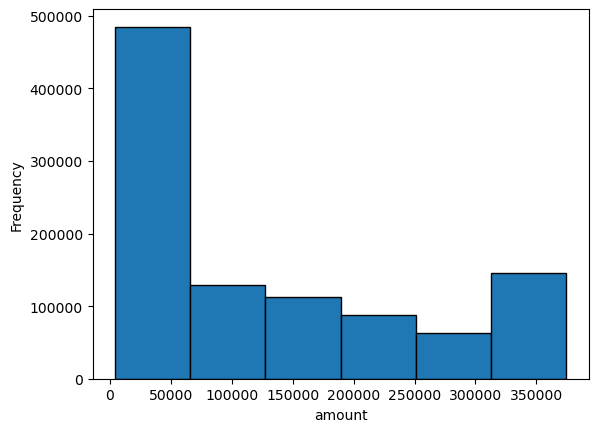

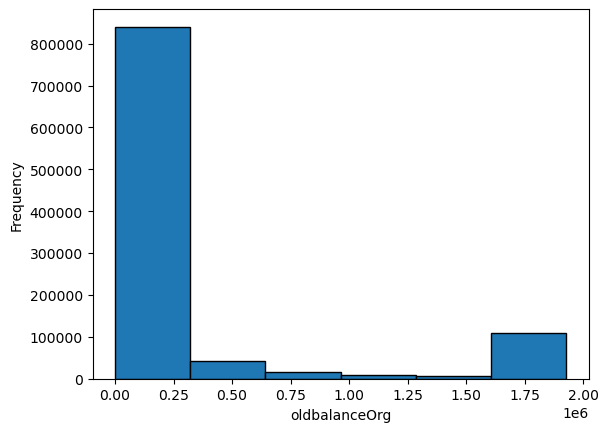

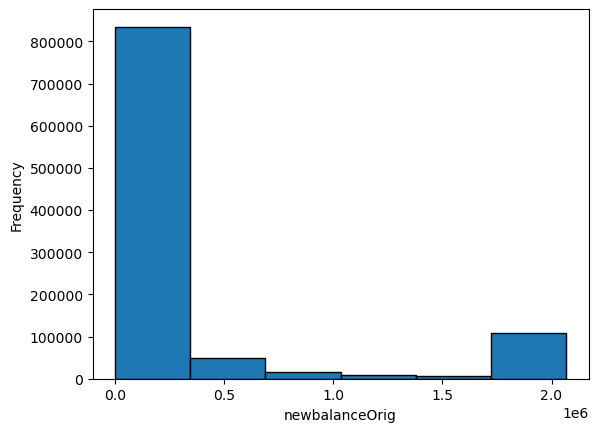

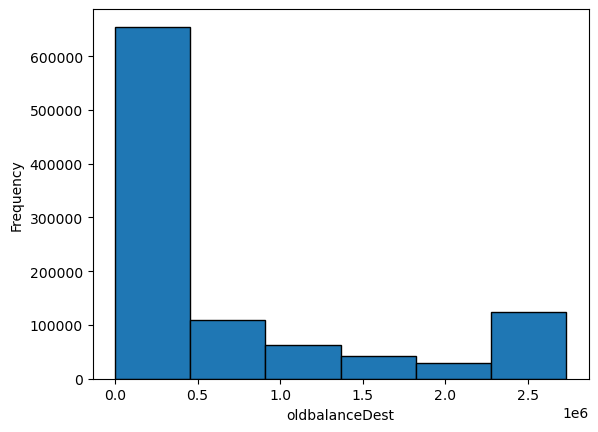

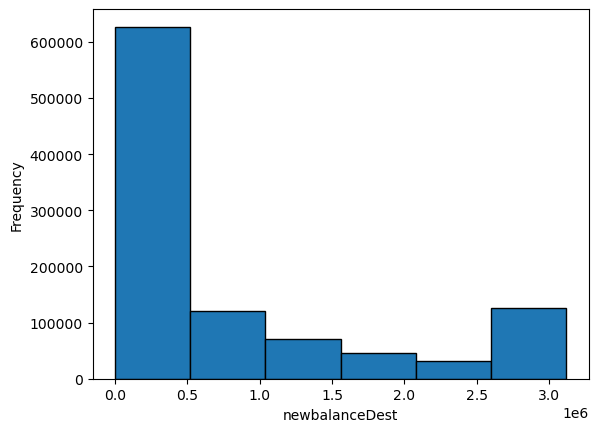

In [15]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    new_df[i].plot(kind='hist', bins=6, edgecolor='black')
    plt.xlabel(i)
    plt.show()

Insights:-
Amount ranges between 0-37 lakhs with more values ranging between 0-75,000


1.OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-3,75,000
2.NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-3,75,000
3.OldbalanceDest ranges around 0-29 lakh with common values around 0-6,25,000
4.NewbalanceDest ranges around 0-35 lakh with common values around 0-5,00,000

# Finding Cross-Relations

<b> Now we will try finding relations between column isFraud and other columns</b>

<b>let us begin with Type </b>

In [16]:
f_df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

There are 5 different types of transaction mode

<Axes: xlabel='type', ylabel='count'>

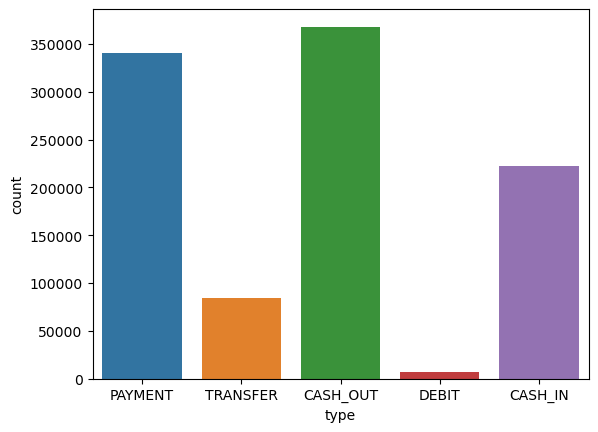

In [17]:
import seaborn as sns
sns.countplot(x='type', data=f_df)

We observe that maximum transaction type is cash out

Let us see through which type has maximum fraud cases

Text(0.5, 1.0, 'Type vs Fraud')

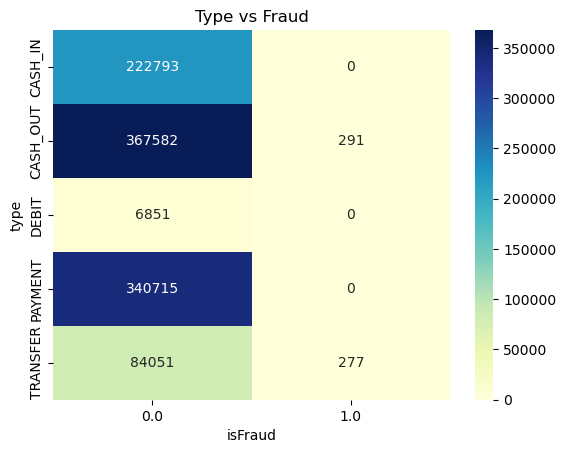

In [18]:
crosstab_data = pd.crosstab(f_df.type, f_df.isFraud)

# Plot the heatmap
sns.heatmap(crosstab_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Type vs Fraud')

<b>Insights:-</b>

Most of the fraud cases occurs in the types:- Transfer and Cash_out

In [19]:
tras=84051+277
tras_fraud=277/(tras)*100
cout=367582+291
cout_fraud=291/(cout)*100
print(f"Percentage of transfer fraud is:-{tras_fraud}%")
print(f"Percentage of cash_out fraud is:-{cout_fraud}%")

Percentage of transfer fraud is:-0.3284792714163742%
Percentage of cash_out fraud is:-0.07910338622296283%


<b>Amount and Fraud</b>

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

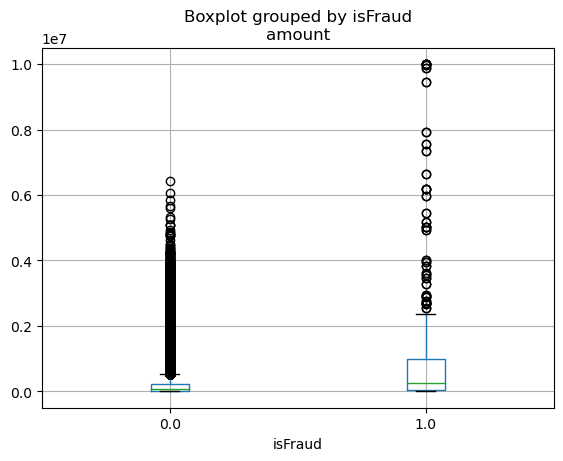

In [20]:
f_df.boxplot(column='amount', by='isFraud')

Text(0.5, 1.0, 'Fraud Cases by Amount Level')

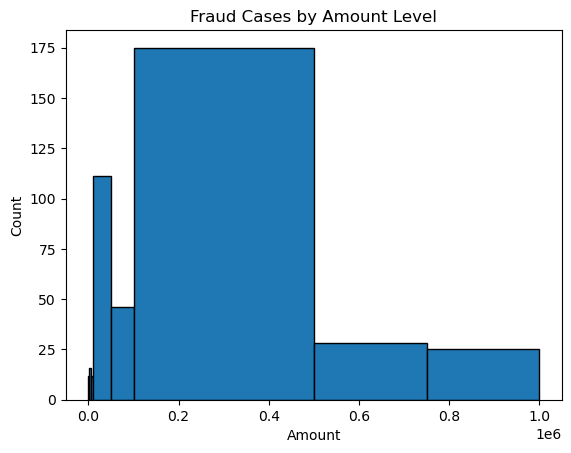

In [21]:
fraud_data = f_df[f_df['isFraud'] == 1]

# Create a histogram or bar plot
bin_edges = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000,750000, 1000000]
plt.hist(fraud_data['amount'], bins=bin_edges, edgecolor='black')

# Set the axis labels and title
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Fraud Cases by Amount Level')




We observe that maximum fraud occurs in the amount range 1-5 lakh

In [22]:
print('Minimum: ',f_df.amount.min())
print('Maximum: ',f_df.amount.max())

Minimum:  0.1
Maximum:  10000000.0


# Fraud Accounts

Since most of the frauds are of the type Transfer and Cashout, we can say that the fraud amount goes into the fraudster account

In [23]:
fraudster=fraud_data.nameDest.value_counts()
fraudster

C935310781     2
C410033330     2
C200064275     2
C803116137     2
C185805228     2
              ..
C1704707395    1
C2025644484    1
C849010584     1
C26381896      1
C966173999     1
Name: nameDest, Length: 563, dtype: int64

<Axes: >

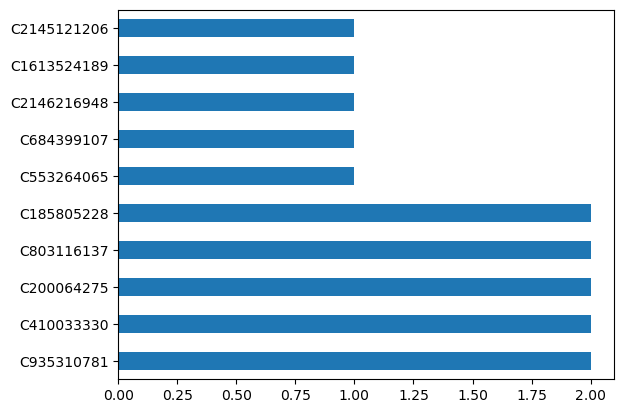

In [24]:
fraudster[:10].plot(kind='barh')

# Machine Learning Algorith

In [25]:
f_df["isFraud"].value_counts()

0.0    1021992
1.0        568
Name: isFraud, dtype: int64

if the dataset is imbalanced, meaning that some classes have significantly fewer instances compared to others, it can lead to biased or inaccurate results. In such cases, sampling techniques like undersampling (reducing the majority class samples) or oversampling (increasing the minority class samples) are often used to address the class imbalance and improve the performance of the model or analysis.

# 1.Without Sampling

In [26]:
f_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1022555,47.0,CASH_OUT,95001.40,C1754043162,182.00,0.00,C1688927068,1136028.63,1231030.03,0.0,0.0
1022556,47.0,PAYMENT,9625.61,C1665870412,15600.00,5974.39,M1417065075,0.00,0.00,0.0,0.0
1022557,47.0,PAYMENT,8581.00,C480579916,5050.00,0.00,M280843649,0.00,0.00,0.0,0.0
1022558,47.0,PAYMENT,8652.07,C706614416,41236.00,32583.93,M1268440714,0.00,0.00,0.0,0.0


We observe that the type has 5 different categorical values. Hence we need to do one hot encoding

In [27]:
enco_df1=pd.get_dummies(f_df['type'])
enco_df=pd.concat([f_df, enco_df1], axis=1)


In [28]:
enco_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1.0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0,0,0,0,1,0
1,1.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0,0,0,0,1,0
2,1.0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0,0,0,0,0,1
3,1.0,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0,0,1,0,0,0
4,1.0,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022555,47.0,CASH_OUT,95001.40,C1754043162,182.00,0.00,C1688927068,1136028.63,1231030.03,0.0,0.0,0,1,0,0,0
1022556,47.0,PAYMENT,9625.61,C1665870412,15600.00,5974.39,M1417065075,0.00,0.00,0.0,0.0,0,0,0,1,0
1022557,47.0,PAYMENT,8581.00,C480579916,5050.00,0.00,M280843649,0.00,0.00,0.0,0.0,0,0,0,1,0
1022558,47.0,PAYMENT,8652.07,C706614416,41236.00,32583.93,M1268440714,0.00,0.00,0.0,0.0,0,0,0,1,0


In [29]:
enco_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')

In [30]:
X=enco_df.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)

In [31]:
Y=enco_df['isFraud']

In [32]:
X.shape

(1022560, 12)

In [51]:
Y.shape

(1022560,)

<b>Splitting data into Training set and Test set</b>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [34]:
X_train, X_cv, y_train, y_cv = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [36]:
reg=LogisticRegression()
Xset=[X_train,X_cv]
Yset=[y_train,y_cv]
for i in range(len(Xset)):
    reg.fit(Xset[0],Yset[0])
    y_pred=reg.predict(Xset[i])
    train_acc=accuracy_score(Yset[i],y_pred)
    print(f"Accuracy:-{train_acc}")
    

Accuracy:-0.9995140868959321
Accuracy:-0.9994865839496363


# XGBoost

In [37]:
XG=XGBClassifier()
Xset=[X_train,X_cv]
Yset=[y_train,y_cv]
for i in range(len(Xset)):
    XG.fit(Xset[0],Yset[0])
    y_pred=XG.predict(Xset[i])
    train_acc=accuracy_score(Yset[i],y_pred)
    print(f"Accuracy:-{train_acc}")

Accuracy:-0.9999694394274171
Accuracy:-0.9998166371248701


# Random Forest Classifier

In [38]:
rf= RandomForestClassifier(n_estimators=50, random_state=42)
Xset=[X_train,X_cv]
Yset=[y_train,y_cv]
for i in range(len(Xset)):
    rf.fit(Xset[0],Yset[0])
    y_pred=rf.predict(Xset[i])
    train_acc=accuracy_score(Yset[i],y_pred)
    print(f"Accuracy:-{train_acc}")

Accuracy:-0.9999969439427417
Accuracy:-0.9997738524540065


# Performing Random Oversampling

We will do this because of the imbalance between y_train having value 1 and 0

Random oversampling involves randomly duplicating samples from the minority class (in this case, the samples with a value of 1) to match the count of the majority class samples (the samples with a value of 0). This technique also helps balance the class distribution.

In [43]:
from sklearn.utils import resample
minority_samples = X[Y == 1]
majority_samples = X[Y == 0]


In [44]:
minority_samples.shape

(568, 12)

In [45]:
majority_samples.shape

(1021992, 12)

In [48]:
oversampled_minority_samples = resample(minority_samples,
                                        replace=True,
                                        n_samples=500000,
                                        random_state=42)
X_oversampled = np.concatenate((majority_samples, oversampled_minority_samples))
y_oversampled = np.concatenate((np.zeros(len(majority_samples)),
                                np.ones(len(oversampled_minority_samples))))

In [49]:
X_oversampled.shape

(1521992, 12)

In [50]:
y_oversampled.shape

(1521992,)

In [53]:
X_tro, X_teo, y_tro, y_teo = train_test_split(
    X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Logistic Reg with Oversampling

In [54]:
reg=LogisticRegression()
Xset=[X_tro,X_teo]
Yset=[y_tro,y_teo]
for i in range(len(Xset)):
    reg.fit(Xset[0],Yset[0])
    y_pred=reg.predict(Xset[i])
    train_acc=accuracy_score(Yset[i],y_pred)
    print(f"Accuracy:-{train_acc}")

Accuracy:-0.9241183219680139
Accuracy:-0.9246285303171167


# XGBoost with Oversampling

In [55]:
XG=XGBClassifier()
Xset=[X_tro,X_teo]
Yset=[y_tro,y_teo]
for i in range(len(Xset)):
    XG.fit(Xset[0],Yset[0])
    y_pred=XG.predict(Xset[i])
    train_acc=accuracy_score(Yset[i],y_pred)
    print(f"Accuracy:-{train_acc}")

Accuracy:-0.999888304219883
Accuracy:-0.9998160309330846


In [60]:
rf= RandomForestClassifier(n_estimators=50, random_state=42)
Xset=[X_tro,X_teo]
Yset=[y_tro,y_teo]
for i in range(len(Xset)):
    rf.fit(Xset[0],Yset[0])
    y_pred=rf.predict(Xset[i])
    train_acc=accuracy_score(Yset[i],y_pred)
    print(f"Accuracy:-{train_acc}")

Accuracy:-1.0
Accuracy:-0.9999901445142724
